# Experiment CRM Sim with SimPy

https://simpy.readthedocs.io/en/latest/contents.html

In [1]:
import pandas as pd
import random
import re
import simpy
import sys
import xml.etree.ElementTree as ET

from eccore.ipython import nb_setup
from pathlib import Path
from pprint import pprint
from uuid import uuid4

nb_setup()

from crm_pysd import CustomerRelationManagerSimulator
from enums import AccountStage, AccountStatus, AccountType, LeadSource, Month, OpportunityStage
from sdmodel import SDModel, stocks, var_of_interest, flows
from utils import dict_index, draw_value_beta

import warnings
warnings.filterwarnings('ignore')


Added path: /home/vtec/projects/diyai/crm-sim/src
Set autoreload mode


1. **Prospecting**:  Identifying potential customers. -> MQL
2. **Qualification**:  Assessing fit and buying intent. -> SQL
3. **Needs Assessment**:  Understanding specific requirements. -> CONTACTED
4. **Presentation**:  Demonstrating the solution's value. -> PITCHED
5. **Proposal**:  Bid and Addressing concerns. -> BIDDED
6. **Closing**:  Securing commitment. -> SIGNED
7. **Post-Sale Follow-up**:  Ensuring satisfaction and fostering loyalty. -> goes back to SQL for other products

In [2]:
crm = CustomerRelationManagerSimulator(nb_accounts=100, nb_salesreps=2)
crm.retrieve_accounts().sample(3)

,account_type,country,created,env,industry,lead_source,name,stage,uid,sales_rep
48,AccountType.LARGE,Belgium,0,<simpy.core.Environment object at 0x7ff3fc733250>,Chemicals,LeadSource.WEBSITE_CTA,EurisPack NV,AccountStage.MQL,acct-42813658-721c-4729-8deb-2ef4c6b2a258,SalesRep(name=SalesRep 2 uid=srep-14108de5-7be...
53,AccountType.LARGE,China,0,<simpy.core.Environment object at 0x7ff3fc733250>,Food & Beverage,LeadSource.WEBSITE_CTA,ShenPack Ltd.,AccountStage.MQL,acct-380f9328-4a7b-4af4-98c5-b349ca2df713,SalesRep(name=SalesRep 2 uid=srep-14108de5-7be...
88,AccountType.LARGE,Poland,0,<simpy.core.Environment object at 0x7ff3fc733250>,Electronics,LeadSource.WEBSITE_CTA,SzczecinPak Sp. z o.o.,AccountStage.MQL,acct-6072e5ca-12c7-43a6-a88f-efa01d5cc3da,SalesRep(name=SalesRep 2 uid=srep-14108de5-7be...


You can assign **realistic purchase orders** based on company size and industry:
- **SMALL**: $10,000 – $100,000 for SMEs
- **MEDIUM**: $100,000 – $500,000 for mid market companies
- **LARGE**: $500,000 – $2,000,000+ for large enterprises


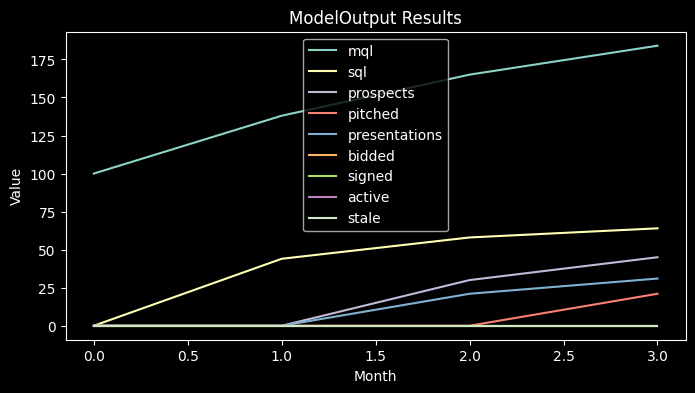

In [3]:
sim = SDModel()
sim.steps(num_steps=3)
sim.plot_results(coi=stocks, figsize=(8,4))

In [4]:
crm.retrieve_accounts().account_type.unique()

array([<AccountType.LARGE: 3>], dtype=object)

In [5]:
random.choice(list(AccountType))

<AccountType.SMALL: 1>

In [6]:
display(sim.step_results_df.loc[:, flows['mql']].iloc[-1,:].T)
# display(sim.step_results_df.loc[:, flows['mql']].T.sum(axis=1))

mql                    184
mql website             35
mql online campaign     38
mql industry events     24
mql salesreps            0
sales qualified         57
mql decay               27
Name: 3, dtype: int64

In [7]:
crm.update_accounts(sim.step_results_df)

In [8]:
df = crm.retrieve_accounts()
df.shape

(369, 10)

In [9]:
[df.loc[df['stage'] == stage, :].shape[0] for stage in list(AccountStage)]

[0, 197, 76, 52, 32, 12, 0, 0, 0]

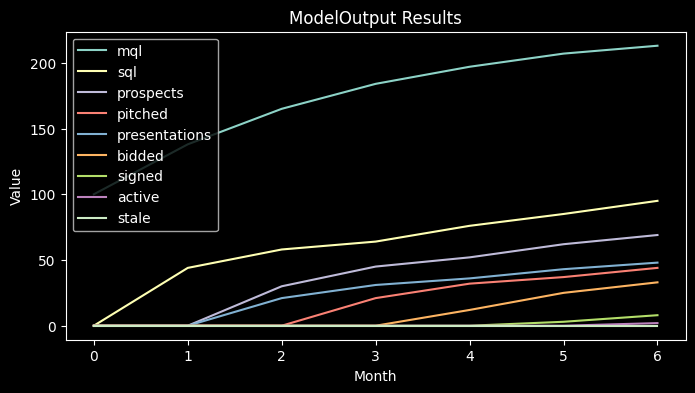

[0, 231, 115, 84, 60, 53, 10, 8, 0]


In [10]:
sim.steps(num_steps=3)
sim.plot_results(coi=stocks, figsize=(8,4))
# display(sim.step_results_df.loc[:, flows['mql']].iloc[-1,:].T)
# display(sim.step_results_df.loc[:, flows['sql']].iloc[-1,:].T)
df = crm.retrieve_accounts()
# print([df.loc[df['stage'] == stage, :].shape[0] for stage in list(AccountStage)])
crm.update_accounts(sim.step_results_df)
df = crm.retrieve_accounts()
print([df.loc[df['stage'] == stage, :].shape[0] for stage in list(AccountStage)])

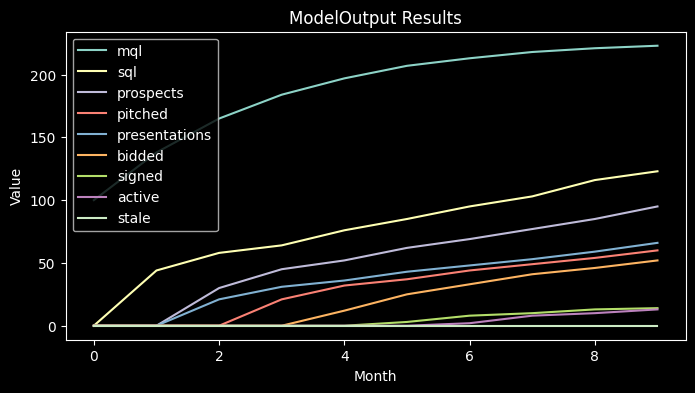

[0, 243, 151, 116, 82, 78, 18, 21, 0]


In [11]:
sim.steps(num_steps=3)
sim.plot_results(coi=stocks, figsize=(8,4))
# display(sim.step_results_df.loc[:, flows['mql']].iloc[-1,:].T)
# display(sim.step_results_df.loc[:, flows['sql']].iloc[-1,:].T)
df = crm.retrieve_accounts()
# print([df.loc[df['stage'] == stage, :].shape[0] for stage in list(AccountStage)])
crm.update_accounts(sim.step_results_df)
df = crm.retrieve_accounts()
print([df.loc[df['stage'] == stage, :].shape[0] for stage in list(AccountStage)])

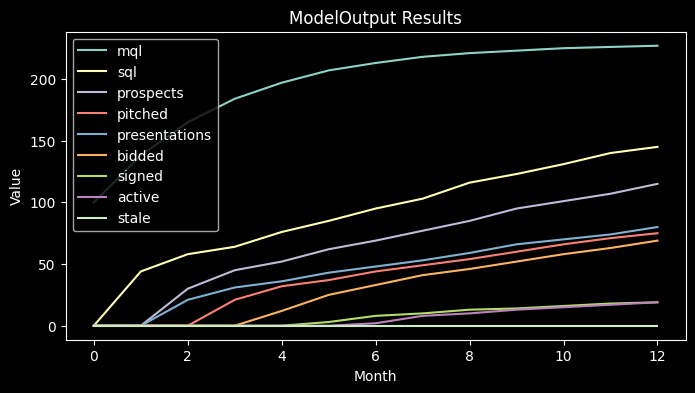

[0, 247, 181, 140, 102, 100, 25, 28, 0]


In [12]:
sim.steps(num_steps=3)
sim.plot_results(coi=stocks, figsize=(8,4))
# display(sim.step_results_df.loc[:, flows['mql']].iloc[-1,:].T)
# display(sim.step_results_df.loc[:, flows['sql']].iloc[-1,:].T)
df = crm.retrieve_accounts()
# print([df.loc[df['stage'] == stage, :].shape[0] for stage in list(AccountStage)])
crm.update_accounts(sim.step_results_df)
df = crm.retrieve_accounts()
print([df.loc[df['stage'] == stage, :].shape[0] for stage in list(AccountStage)])

## Sandbox

### Beta Function

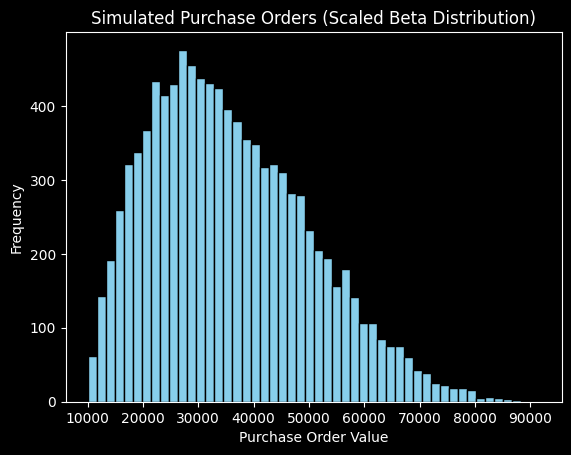

In [13]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Parameters for the Beta distribution (right-skewed)
alpha = 2
beta_param = 5

# Number of samples to generate
n_samples = 10000

# Generate Beta distributed samples on [0, 1]
samples_unit = beta.rvs(alpha, beta_param, size=n_samples)

# Scale samples to [10000, 100000]
val_min, val_max = 10000, 100000
samples_scaled = val_min + samples_unit * (val_max - val_min)

# Optional: visualize the distribution
plt.hist(samples_scaled, bins=50, color='skyblue', edgecolor='black')
plt.title('Simulated Purchase Orders (Scaled Beta Distribution)')
plt.xlabel('Purchase Order Value')
plt.ylabel('Frequency')
plt.show()


### XML Parsing from xmile

In [14]:
import xml.etree.ElementTree as ET
p2xml = Path('../data/04-crm.xmile')
tree = ET.parse(p2xml)
root = tree.getroot()
# for child in root:
#     print(child.tag, child.attrib)

Get all variables name as per the model

In [15]:
p2xml = Path('../data/04-crm.xmile')
tree = ET.parse(p2xml)
root = tree.getroot()

# Define the namespace (use the actual namespace in your XML)
ns = {'xmile': 'http://docs.oasis-open.org/xmile/ns/XMILE/v1.0'}

# Find all stock and aux elements
stocks = root.findall('.//xmile:stock', ns)
auxs = root.findall('.//xmile:aux', ns)

# Extract the 'name' attribute from each
stock_names = [stock.attrib['name'].replace('-', '_') for stock in stocks]
aux_names = [aux.attrib['name'].replace('-', '_') for aux in auxs]

print("Stock names:", stock_names)
print("Aux names:", aux_names)


Stock names: ['active', 'bidded', 'mql', 'pitched', 'prospects', 'signed', 'sql', 'stale']
Aux names: ['bids', 'completed', 'contracts', 'lost_bids', 'mql_decay', 'mql_industry_events', 'mql_online_campaign', 'mql_salesreps', 'mql_website', 'new_mql', 'new_prospects', 'presentations', 'prospect_decay', 'raw_leads_from_website', 'rawleads_industry_events', 'rawleads_online_campaign', 'sales_qualified', 'satisfied', 'sql_decay', 'sql_salesreps', 'stale_prospects', 'unsatisfied', 'bid2close', 'customer_satisfaction_rate', 'decay_rate', 'mql2sql', 'nb_industry_events', 'nb_mthly_website_visitor', 'online_campaigns_clickthru', 'online_campaigns_targets', 'prez2bid', 'prospect2prez', 'rawlead2mql_industry_event', 'rawlead2mql_online_campaign', 'rawlead2mql_website', 'rawleads_salesreps', 'salesrep_leads2mql', 'sql2prospect', 'website_cta_rate']


In [16]:
for s in stock_names:
    print(s)

active
bidded
mql
pitched
prospects
signed
sql
stale


In [17]:
for a in aux_names:
    print(a)

bids
completed
contracts
lost_bids
mql_decay
mql_industry_events
mql_online_campaign
mql_salesreps
mql_website
new_mql
new_prospects
presentations
prospect_decay
raw_leads_from_website
rawleads_industry_events
rawleads_online_campaign
sales_qualified
satisfied
sql_decay
sql_salesreps
stale_prospects
unsatisfied
bid2close
customer_satisfaction_rate
decay_rate
mql2sql
nb_industry_events
nb_mthly_website_visitor
online_campaigns_clickthru
online_campaigns_targets
prez2bid
prospect2prez
rawlead2mql_industry_event
rawlead2mql_online_campaign
rawlead2mql_website
rawleads_salesreps
salesrep_leads2mql
sql2prospect
website_cta_rate


In [18]:
def get_aux_eqn(name, root, ns):

    aux_elem = root.find(f".//xmile:aux[@name='{name}']", ns)
    eqn_elem = aux_elem.find("xmile:eqn", ns)
    if eqn_elem is not None:
        eqn =  eqn_elem.text
    else:
        raise RuntimeError(f"No equation found for aux '{name}'")
    
    pat = re.compile(r'^(?:(?P<fctn>INTEGER\s*\()|())\s*(?P<eqn>.+?)\s*\)?\s*$')
    matches = pat.match(eqn)
    mdict = matches.groupdict()
    fctn = mdict.get('fctn',None)
    eqn = mdict.get('eqn',None)
    fcnt_start = '' if fctn is None else 'int('
    fctn_end = '' if fctn is None else ')'
    return f"{fcnt_start}{eqn}{fctn_end}"

aux_equations = {}
for aux_name in aux_names:
    aux_equations[aux_name] = get_aux_eqn(aux_name, root, ns)

# pprint(aux_equations)

In [19]:
def get_stock_flows(name, root, ns):

    stock_elem = root.find(f".//xmile:stock[@name='{name}']", ns)
    inflow_elems = stock_elem.findall("xmile:inflow", ns)
    outflow_elems = stock_elem.findall("xmile:outflow", ns)
    if inflow_elems is not None:
        inflows =  [elem.text.replace('\n', '').replace('\t','').replace(' ','_') for elem in inflow_elems if elem.text is not None]
    else:
        raise RuntimeError(f"No inflow found for stock '{name}'")

    if outflow_elems is not None:
        outflows =  [elem.text.replace('\n', '').replace('\t','').replace(' ','_') for elem in outflow_elems if elem.text is not None]
    else:
        raise RuntimeError(f"No outflow found for stock '{name}'")

    return {'inflows': inflows, 'outflows': outflows}

stock_flows = {}
for name in stock_names:
    stock_flows[name] = get_stock_flows(name, root, ns)

# pprint(stock_flows)


### Parse model.py file

In [20]:
callables = [name for name in dir(sim.model) if callable(getattr(sim.model, name))]
callables

['_Macro__get_varname_from_ext_name',
 '_Macro__include_for_serialization',
 '__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_add_constant_cache',
 '_assign_cache',
 '_assign_cache_type',
 '_build_doc',
 '_config_simulation',
 '_constant_component',
 '_count_calls',
 '_default_return_columns',
 '_euler_step',
 '_get_data',
 '_get_elements_to_initialize',
 '_get_full_dependencies',
 '_get_initialize_order',
 '_integrate',
 '_integrate_step',
 '_isdynamic',
 '_remove_constant_cache',
 '_select_submodel',
 '_set_capture_elements',
 '_set_components',
 '_set_control_vars',
 '_set_progressbar',
 '_set_stateful',
 '_split_capture_elements',
 '_timeseries_component',
 'cache',
 'clean_caches',
 'copy',

In [21]:
sim.model

### Extract aux variable from model manually

<img src="/home/vtec/projects/diyai/crm-sim/img/mql.jpg" width="800">


Get names of variables in the right order

In [22]:
ordered_aux = [
    'decay_rate',
    'nb_mthly_website_visitor',
    'website_cta_rate',
    'raw_leads_from_website',
    'rawlead2mql_website',
    'mql_website',
    'online_campaigns_targets',
    'online_campaigns_clickthru',
    'rawleads_online_campaign',
    'rawlead2mql_online_campaign',
    'mql_online_campaign',
    'nb_industry_events',
    'rawleads_industry_events',
    'rawlead2mql_industry_event',
    'mql_industry_events',
    'rawleads_salesreps',
    'salesrep_leads2mql',
    'mql_salesreps',
    'new_mql',

    'mql2sql',
    'sql_salesreps',
    'sales_qualified',
    'mql_decay',

    'sql2prospect',
    'new_prospects',
    'sql_decay',

    'prospect2prez',
    'presentations',
    'prospect_decay',
    
    'prez2bid',
    'bids',
    'stale_prospects',

    'bid2close',
    'contracts',
    'lost_bids',

    'customer_satisfaction_rate',
    'satisfied',
    'unsatisfied',
    
    'completed',
]

In [23]:
for aux_name in ordered_aux:
    print(f"{aux_name} = {aux_equations[aux_name]}")

decay_rate = 0.1
nb_mthly_website_visitor = 2900
website_cta_rate = 0.03
raw_leads_from_website = int(website_cta_rate * nb_mthly_website_visitor)
rawlead2mql_website = 0.41
mql_website = int(raw_leads_from_website * rawlead2mql_website)
online_campaigns_targets = 1000
online_campaigns_clickthru = 0.1
rawleads_online_campaign = int(online_campaigns_clickthru * online_campaigns_targets)
rawlead2mql_online_campaign = 0.38
mql_online_campaign = int(rawleads_online_campaign * rawlead2mql_online_campaign)
nb_industry_events = 1
rawleads_industry_events = 80 * nb_industry_events
rawlead2mql_industry_event = 0.3
mql_industry_events = int(rawleads_industry_events * rawlead2mql_industry_event)
rawleads_salesreps = 30
salesrep_leads2mql = 0.02
mql_salesreps = int(rawleads_salesreps * salesrep_leads2mql)
new_mql = int(mql_website + mql_online_campaign + mql_industry_events + mql_salesreps)
mql2sql = 0.15
sql_salesreps = rawleads_salesreps * (1-salesrep_leads2mql
sales_qualified = int(mql * mql2sq

In [24]:
ordered_stock = [
    'mql',
    'sql',
    'prospects',
    'pitched',
    'bidded',
    'signed',
    'active',
    'stale',
]
for stock_name in ordered_stock:
    inflows = stock_flows[stock_name]['inflows']
    in_formula = ' + '.join(inflows) if inflows else '0'
    outflows = stock_flows[stock_name]['outflows']
    out_formula = ' - '.join(outflows) if outflows else '0'
    print(f"{stock_name} = {in_formula} - {out_formula}")

mql = new_mql - mql_decay - sales_qualified
sql = completed + lost_bids + sales_qualified + stale_prospects - new_prospects - sql_decay
prospects = new_prospects - presentations - prospect_decay
pitched = presentations - bids - stale_prospects
bidded = bids - contracts - lost_bids
signed = contracts - satisfied - unsatisfied
active = satisfied - completed
stale = unsatisfied - 0


Initialise Stocks

In [25]:
mql = 100
sql = 0
prospects = 0
pitched = 0
bidded = 0
signed = 0
active = 0
stale = 0

In [26]:
set(aux_equations.keys()).difference(set(ordered_aux))

set()

In [ ]:
mql = 0

decay_rate = 0.1

nb_mthly_website_visitor = 2_900 # mean beween 2,700 to 3,100 unique visitors per month
website_cta_rate = 0.03
raw_leads_from_website = nb_mthly_website_visitor * website_cta_rate
rawlead2mql_website = 0.41
mql_website = int(raw_leads_from_website * website_cta_rate)

online_campaigns_targets = 1_000 # targeted people per month
online_campaigns_clickthru = 0.10
rawleads_online_campaign = int(online_campaigns_targets * online_campaigns_clickthru)
rawlead2mql_online_campaign = 0.38
mql_online_campaign = int(rawleads_online_campaign * rawlead2mql_online_campaign)

nb_industry_events = 1
rawleads_industry_events = 250
rawlead2mql_industry_event = 0.30
mql_industry_events = int(nb_industry_events * rawleads_industry_events * rawlead2mql_industry_event)

rawleads_salesreps = 10 # between 20 to 50 per quarter
salesrep_leads2mql = 0.02
mql_salesreps = int(rawleads_salesreps * salesrep_leads2mql)


new_mql = mql_website + mql_online_campaign + mql_industry_events + mql_salesreps
mql_decay = int(mql * decay_rate)
mql = mql + new_mql - sales_qualified - mql_decay


mql = new_mql - mql_decay - sales_qualified
sql = completed + lost_bids + sales_qualified + stale_prospects - new_prospects - sql_decay
prospects = new_prospects - presentations - prospect_decay
pitched = presentations - bids - stale_prospects
bidded = bids - contracts - lost_bids
signed = contracts - satisfied - unsatisfied
active = satisfied - completed
stale = unsatisfied - 0



- decay_rate

**MQL**: Marketing Qualified Lead
- **mql**
    - new_mql
        - mql_website
            - website_cta_rate
            - raw_leads_from_website
            - rawlead2mql_website
        - mql_online_campaign
            - online_campaigns_targets
            - online_campaigns_clickthru
            - rawleads_online_campaign
            - rawlead2mql_online_campaign
        - mql_industry_events
            - rawleads_industry_events
            - rawlead2mql_industry_event
        - mql_salesreps
            - rawleads_salesreps
            - salesrep_leads2mql
            
    - sales_qualified
    - mql_decay
        - decay_rate

**SQL**: Sales Qualified Lead
- **sql**
    - sales_qualified
        - mql2sql
        - sql_salesreps
            - rawleads_salesreps
            - salesrep_leads2mql
    - stale_prospects
    - lost_bid 

    - new_prospects   
    - sql_decay


**PROSPECT**:
- **prospects**

**PITCHED**
- **pitched**


**BIDDED**:
- **bidded**


**SIGNED**
- **signed**


**ACTIVE**
- **active**
- **stale**




- bids
- completed
- contracts
- lost_bids
- new_prospects
- presentations
- satisfied
- prospect_decay
- stale_prospects
- unsatisfied
- bid2close
- customersatisfactionrate
- prez2bid
- prospect2prez
- sql2prospect

### Others